## World COVID-19 vaccination (Our world in data)

In [4]:
import pandas as pd
import os
import urllib
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
file_path = os.path.join('data', 'covid')

In [6]:
urllib.request.urlretrieve(url, './data.csv')

('./data.csv', <http.client.HTTPMessage at 0x2b95e636190>)

In [7]:
vax_data = pd.read_csv('./data.csv')
vax_data = vax_data.drop_duplicates('location', keep='last')

### People fully vacinated per hundred

50


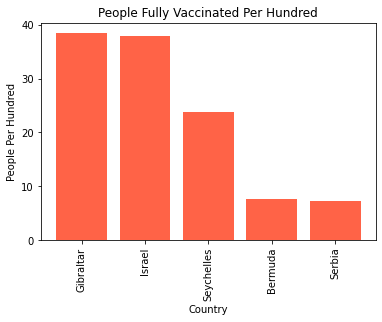

50


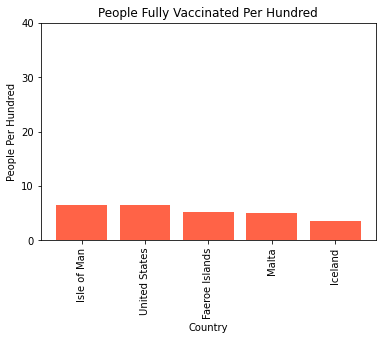

50


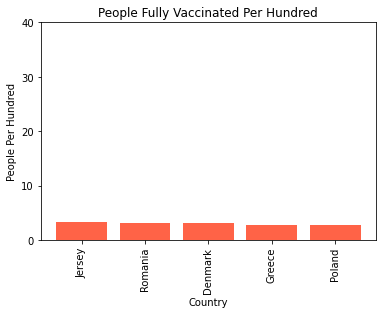

50


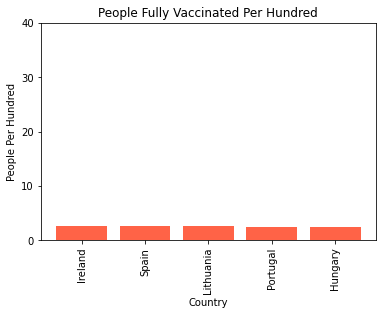

50


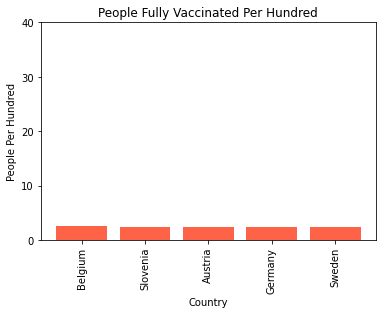

50


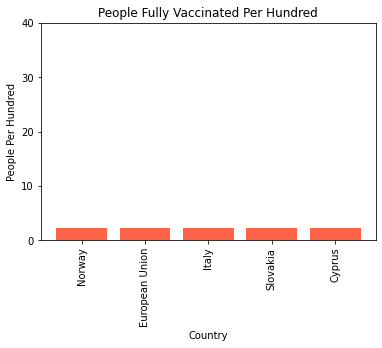

50


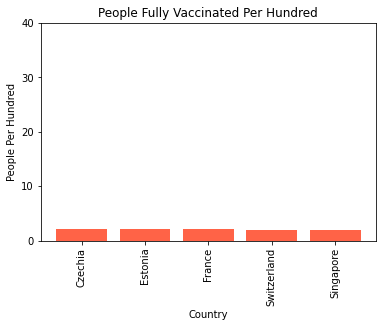

50


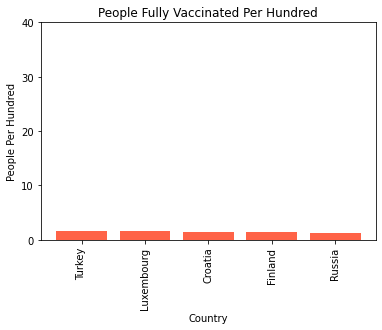

50


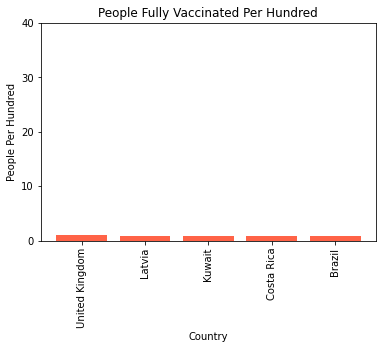

50


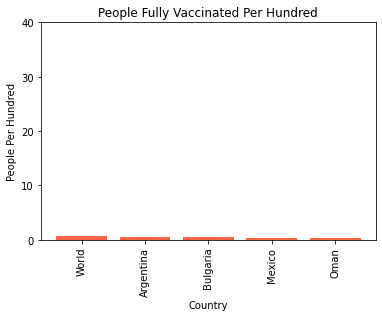

50


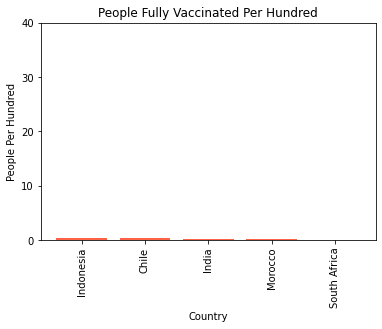

In [8]:
import math

vax_per_hundred = vax_data.loc[:,['location', 'iso_code', 'people_fully_vaccinated_per_hundred']].sort_values('people_fully_vaccinated_per_hundred', ascending=False)
vax_per_hundred.dropna(inplace=True)
vax_per_hundred.reset_index(inplace=True, drop=True)

locations = vax_per_hundred.loc[:, 'location'].to_list()
numbers = vax_per_hundred.loc[:, 'people_fully_vaccinated_per_hundred'].to_list()

def dispBarGraph(locations, numbers, max):
    plt.bar(locations, numbers, color='tomato')
    plt.title('People Fully Vaccinated Per Hundred')
    plt.xticks(rotation=90)
    plt.yticks(range(0,max, 10))
    plt.xlabel('Country')
    plt.ylabel('People Per Hundred')
    plt.show()

temp_locations = []
temp_numbers = []
max_num = vax_per_hundred.loc[0]['people_fully_vaccinated_per_hundred']
max_num = int(max_num + (10 - max_num % 10) + 10)

for i, val in vax_per_hundred.iterrows():
    temp_locations.append(val['location'])
    temp_numbers.append(val['people_fully_vaccinated_per_hundred'])
    if (i - 5) % 5 < 4:
        continue
    else:
        print(max_num)
        dispBarGraph(temp_locations, temp_numbers, max_num)
        temp_locations = []
        temp_numbers = []

In [11]:
vax_data

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
46,Albania,ALB,2021-02-25,10135.0,NaN,NaN,NaN,1012.0,0.35,NaN,NaN,352.0
68,Algeria,DZA,2021-02-19,75000.0,NaN,NaN,NaN,3748.0,0.17,NaN,NaN,85.0
99,Andorra,AND,2021-02-24,2390.0,2390.0,NaN,NaN,57.0,3.09,3.09,NaN,738.0
110,Anguilla,AIA,2021-02-14,2762.0,2762.0,NaN,1421.0,331.0,18.41,18.41,NaN,22064.0
169,Argentina,ARG,2021-02-25,829832.0,558831.0,271001.0,49377.0,27750.0,1.84,1.24,0.60,614.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4151,United Kingdom,GBR,2021-02-24,19392553.0,18691835.0,700718.0,480575.0,342250.0,28.57,27.53,1.03,5042.0
4219,United States,USA,2021-02-25,68274117.0,46074392.0,21555117.0,1809170.0,1505193.0,20.41,13.78,6.45,4501.0
4293,Wales,NaN,2021-02-24,959121.0,889270.0,69851.0,21336.0,16735.0,30.42,28.21,2.22,5308.0
4368,World,OWID_WRL,2021-02-25,227615597.0,135567635.0,47644026.0,4846522.0,4519665.0,2.92,1.74,0.61,580.0
